In [1]:
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()


In [2]:
pkg = mp.jupyter.open_package()
#pkg = mp.jupyter.open_source_package()
pkg

# County Health Rakings
`countyhealthrankings.org-county-1.1.2` Last Update: 2020-05-21T04:27:07

_The CHR&R program provides data, evidence, guidance, and examples to build awareness of the multiple factors that influence health and support community leaders working to improve health and increase health equity. The Rankings are unique in their ability to measure the health of nearly every county in all 50 states,and are complemented by guidance, tools, and resources designed to accelerate community learning and action._


## Documentation Links

* [documentation](https://www.countyhealthrankings.org/sites/default/files/media/document/2020%20Analytic%20Documentation_0.pdf) Primary documentation
* [homepage](https://www.countyhealthrankings.org/) Project homepage
* [data_download](https://www.countyhealthrankings.org/explore-health-rankings/rankings-data-documentation) Page with links to data files and documentation

 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [county_health_rankings](data/county_health_rankings.csv)**. Complete datafile with all measures and supporting values. Over 800 columns.

## References
<ul><li> <strong><a href="https://www.countyhealthrankings.org/sites/default/files/media/document/analytic_data2020.csv">source</a></strong>. County-level statistics for a variety of health measures</li><li> <strong>county_boundaries</string>, <em>metapack+http://library.metatab.org/census.gov-boundaries-2018.csv#county_20m</em>. County grographic boundary shapes.</li><ul>

In [3]:
chr = pkg.resource('county_health_rankings').dataframe()
chr.head()

,geoid,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,...,v013_rawvalue,v016_rawvalue,v017_rawvalue,v025_rawvalue,v026_rawvalue,v027_rawvalue,v031_rawvalue,v032_rawvalue,v035_rawvalue,v097_rawvalue
0,05000US00000,0,0,0,US,United States,2020,NaN,6940.110519,3813889.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05000US01000,1,0,1000,AL,Alabama,2020,NaN,9942.794666,81791.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,05000US01001,1,1,1001,AL,Autauga County,2020,1.0,8128.591190,791.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,05000US01003,1,3,1003,AL,Baldwin County,2020,1.0,7354.122530,2967.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05000US01005,1,5,1005,AL,Barbour County,2020,1.0,10253.573403,472.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
counties = pkg.reference('county_boundaries').geoframe()
counties.head()

,geoid,name,stusab,state_fips,county_fips,land_area,water_area,geometry
0,05000US37017,Bladen,NC,37,17,2265887723,33010866,"POLYGON ((-78.90199799999999 34.835268, -78.79..."
1,05000US37167,Stanly,NC,37,167,1023370459,25242751,"POLYGON ((-80.49737499999999 35.202104, -80.29..."
2,05000US39153,Summit,OH,39,153,1069181981,18958267,"POLYGON ((-81.68698999999999 41.135956, -81.68..."
3,05000US42113,Sullivan,PA,42,113,1165338428,6617028,"POLYGON ((-76.81373099999999 41.590034, -76.22..."
4,05000US48459,Upshur,TX,48,459,1509910100,24878888,"POLYGON ((-95.15273999999999 32.660949, -95.15..."


In [5]:
df = counties.merge(chr, on='geoid')
df = df[~df.stusab.isin(['PR','AK','HI'])]
df.head()

,geoid,name,stusab,state_fips,county_fips,land_area,water_area,geometry,statecode,countycode,...,v013_rawvalue,v016_rawvalue,v017_rawvalue,v025_rawvalue,v026_rawvalue,v027_rawvalue,v031_rawvalue,v032_rawvalue,v035_rawvalue,v097_rawvalue
0,05000US37017,Bladen,NC,37,17,2265887723,33010866,"POLYGON ((-78.90199799999999 34.835268, -78.79...",37,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05000US37167,Stanly,NC,37,167,1023370459,25242751,"POLYGON ((-80.49737499999999 35.202104, -80.29...",37,167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,05000US39153,Summit,OH,39,153,1069181981,18958267,"POLYGON ((-81.68698999999999 41.135956, -81.68...",39,153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,05000US42113,Sullivan,PA,42,113,1165338428,6617028,"POLYGON ((-76.81373099999999 41.590034, -76.22...",42,113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05000US48459,Upshur,TX,48,459,1509910100,24878888,"POLYGON ((-95.15273999999999 32.660949, -95.15...",48,459,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


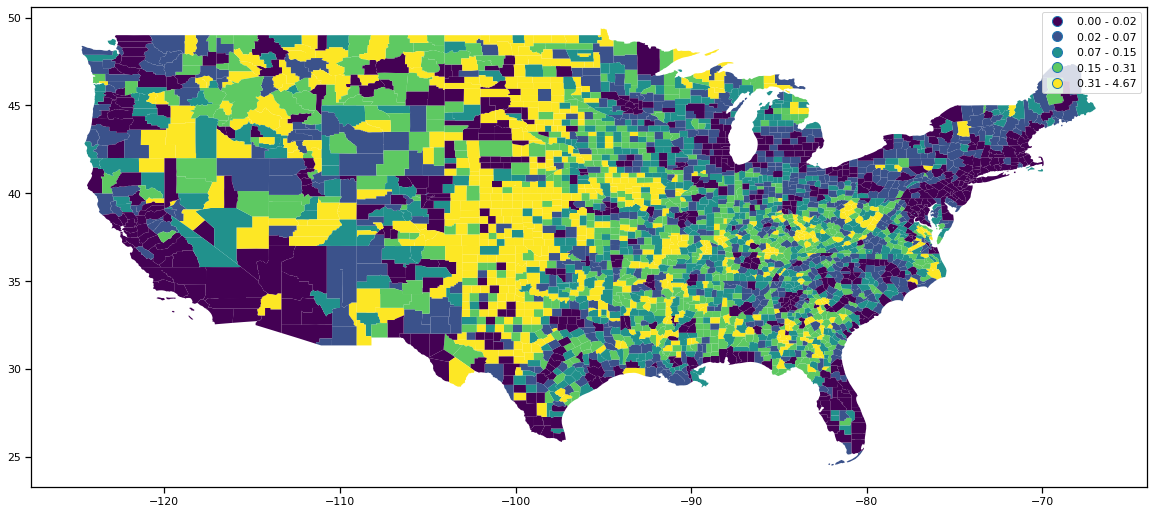

In [64]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

t = df.copy()
t['v'] = (t.v001_race_white / t.v001_denominator).dropna()
t['v'] = t['v'].fillna(0)
fig, ax = plt.subplots(figsize=(20,10))  

t.plot(column='v', ax = ax,scheme='quantiles', legend=True)

In [66]:
t = chr.copy()
t.head()

,geoid,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,...,v013_rawvalue,v016_rawvalue,v017_rawvalue,v025_rawvalue,v026_rawvalue,v027_rawvalue,v031_rawvalue,v032_rawvalue,v035_rawvalue,v097_rawvalue
0,05000US00000,0,0,0,US,United States,2020,NaN,6940.110519,3813889.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05000US01000,1,0,1000,AL,Alabama,2020,NaN,9942.794666,81791.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,05000US01001,1,1,1001,AL,Autauga County,2020,1.0,8128.591190,791.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,05000US01003,1,3,1003,AL,Baldwin County,2020,1.0,7354.122530,2967.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05000US01005,1,5,1005,AL,Barbour County,2020,1.0,10253.573403,472.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
list(sorted(list(set([e.split('_')[0] for e in t.columns if '_' in e and e.startswith('v')]))))

['v001',
 'v002',
 'v003',
 'v004',
 'v005',
 'v008',
 'v009',
 'v010',
 'v011',
 'v013',
 'v014',
 'v015',
 'v016',
 'v017',
 'v018',
 'v019',
 'v021',
 'v023',
 'v024',
 'v025',
 'v026',
 'v027',
 'v031',
 'v032',
 'v035',
 'v036',
 'v037',
 'v039',
 'v042',
 'v043',
 'v044',
 'v045',
 'v049',
 'v050',
 'v051',
 'v052',
 'v053',
 'v054',
 'v055',
 'v056',
 'v057',
 'v058',
 'v059',
 'v060',
 'v061',
 'v062',
 'v063',
 'v065',
 'v067',
 'v069',
 'v070',
 'v080',
 'v081',
 'v082',
 'v083',
 'v085',
 'v088',
 'v097',
 'v099',
 'v100',
 'v101',
 'v103',
 'v104',
 'v105',
 'v106',
 'v107',
 'v109',
 'v116',
 'v117',
 'v118',
 'v119',
 'v120',
 'v122',
 'v123',
 'v124',
 'v125',
 'v126',
 'v127',
 'v128',
 'v129',
 'v131',
 'v132',
 'v133',
 'v134',
 'v135',
 'v136',
 'v137',
 'v138',
 'v139',
 'v140',
 'v141',
 'v142',
 'v143',
 'v144',
 'v145',
 'v147',
 'v148',
 'v149',
 'v150',
 'v153',
 'v154',
 'v155',
 'v156',
 'v158',
 'v159',
 'v160',
 'v161']